In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [7]:
def gaussian_orbital(r, alpha):
    """
    Compute the value of a 1D Gaussian-type orbital.
    
    Parameters:
    - r: distance from nucleus
    - alpha: exponent determining the spread of the Gaussian function
    
    Returns:
    - Value of the GTO at distance r
    """
    # Normalization constant (for simplicity, we won't rigorously compute it here)
    N = 1.0
    return N * np.exp(-alpha * r**2)


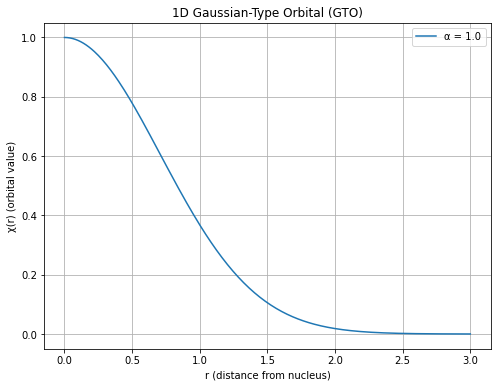

In [8]:
# Define r values (for example, from 0 to 3 with 0.01 intervals)
r_values = np.linspace(0, 3, 300)

# Define alpha (you can adjust this value to see how the GTO changes)
alpha = 1.0

# Compute GTO values
gto_values = gaussian_orbital(r_values, alpha)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(r_values, gto_values, label=f'α = {alpha}')
plt.title('1D Gaussian-Type Orbital (GTO)')
plt.xlabel('r (distance from nucleus)')
plt.ylabel('χ(r) (orbital value)')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
def slater_orbital(r, zeta, l=0):
    """
    Compute the value of a 1D Slater-type orbital.
    
    Parameters:
    - r: distance from nucleus
    - zeta: orbital exponent
    - l: quantum number (default to 0 for s-type)
    
    Returns:
    - Value of the STO at distance r
    """
    # Normalization constant (for simplicity, we won't rigorously compute it here)
    N = 1.0
    return N * r**l * np.exp(-zeta * r)


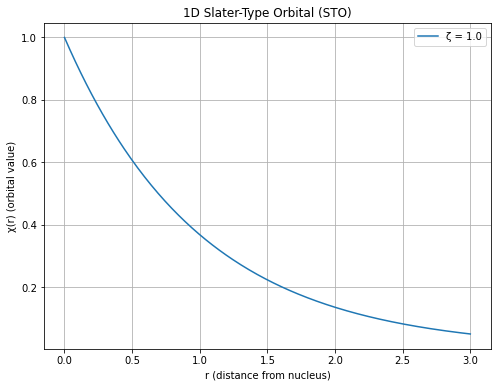

In [10]:
# Define r values (from 0 to 3 with 0.01 intervals)
r_values = np.linspace(0, 3, 300)

# Define zeta (adjust this value to see how the STO changes)
zeta = 1.0

# Compute STO values
sto_values = slater_orbital(r_values, zeta)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(r_values, sto_values, label=f'ζ = {zeta}')
plt.title('1D Slater-Type Orbital (STO)')
plt.xlabel('r (distance from nucleus)')
plt.ylabel('χ(r) (orbital value)')
plt.legend()
plt.grid(True)
plt.show()


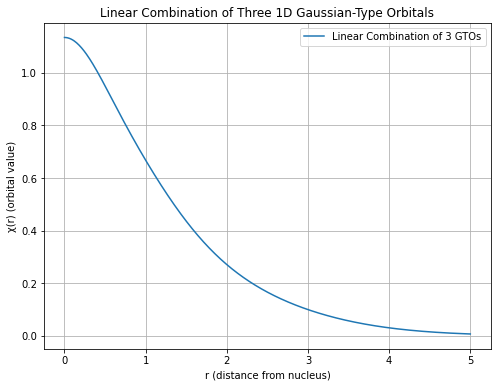

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_orbital(r, alpha, coeff):
    """
    Compute the value of a 1D Gaussian-type orbital.
    
    Parameters:
    - r: distance from nucleus
    - alpha: exponent determining the spread of the Gaussian function
    - coeff: coefficient of the orbital
    
    Returns:
    - Value of the GTO at distance r
    """
    # Normalization constant (for simplicity, we won't rigorously compute it here)
    N = 1.0
    return coeff * N * np.exp(-alpha * r**2)

# Define r values (from 0 to 5 with 0.01 intervals to better visualize the plot)
r_values = np.linspace(0, 5, 500)

# Define coefficients and alphas for the three GTOs from your provided data

coefficients = [0.1543289673, 0.5353281423, 0.4446345422]
alphas = [3.425250914, 0.6239137298, 0.1688554040]


# Compute GTO values and linear combination
combined_gto_values = np.zeros_like(r_values)

for coef, alpha in zip(coefficients, alphas):
    combined_gto_values += gaussian_orbital(r_values, alpha, coef)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(r_values, combined_gto_values, label='Linear Combination of 3 GTOs')
plt.title('Linear Combination of Three 1D Gaussian-Type Orbitals')
plt.xlabel('r (distance from nucleus)')
plt.ylabel('χ(r) (orbital value)')
plt.legend()
plt.grid(True)
plt.show()


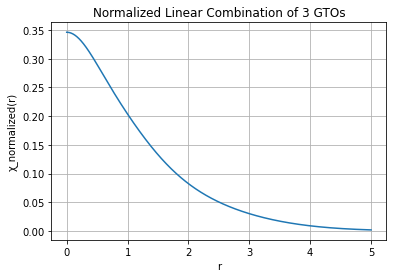

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define coefficients and alphas
d = [0.1543289673, 0.5353281423, 0.4446345422]
α = [3.425250914, 0.6239137298, 0.1688554040]

def χ(r, d, α):
    return sum([di * np.exp(-ai * r**2) for di, ai in zip(d, α)])

# Discretize the space
r_values = np.linspace(0, 5, 1000)
Δr = r_values[1] - r_values[0]

# Calculate χ^2(r) values
χ2_values = [χ(r, d, α)**2 for r in r_values]

# Compute the integral using the trapezoidal rule
integral = 4 * np.pi * np.trapz([r**2 * χ2 for r, χ2 in zip(r_values, χ2_values)], dx=Δr)

# Normalize
N = np.sqrt(integral)
χ_normalized_values = [χ(r, d, α) / N for r in r_values]

# Plot
plt.plot(r_values, χ_normalized_values)
plt.title('Normalized Linear Combination of 3 GTOs')
plt.xlabel('r')
plt.ylabel('χ_normalized(r)')
plt.grid(True)
plt.show()


In [19]:
# Calculate χ_normalized^2(r) values
χ_normalized_squared_values = [val**2 for val in χ_normalized_values]

# Compute the integral using the trapezoidal rule
area_under_curve = 4 * np.pi * np.trapz([r**2 * χ2_norm for r, χ2_norm in zip(r_values, χ_normalized_squared_values)], dx=Δr)

print(f"Area under the squared normalized function curve: {area_under_curve}")


Area under the squared normalized function curve: 1.0
